# Trafik Lambası Sayacı ile İlgili Model Eğitimi (CNN)

## Gerekli Kütüphaneleri Yükleme

In [8]:
# Gerekli kütüphaneleri yükleme
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

print("Gerekli kütüphaneler yüklendi.")


Gerekli kütüphaneler yüklendi.


## Görüntü verilerini yükleme ve işleme

In [9]:
# Görüntü verilerini yükleme ve işleme
def load_images_from_folder(folder):
    images = []
    labels = []
    if not os.path.exists(folder):
        raise FileNotFoundError(f"Klasör bulunamadı: {folder}")
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (170, 350))
            images.append(img)
            # Etiketlerin dosya isminde alt çizgiden önce olduğunu varsayıyoruz, örneğin 'image_label.jpg'
            label = filename.split('_')[1]
            labels.append(label)
    return np.array(images), np.array(labels)

# Klasörden görüntüleri yükleme
folder_path = r'C:\\Users\\WaLFaLaR\\tez\\veri\\son7\\ortss'  # Görüntülerin bulunduğu klasörün yolunu buraya yazın
X, y = load_images_from_folder(folder_path)

print(f"Görüntüler yüklendi. Toplam görüntü sayısı: {len(X)} labels: {y}")

# Etiketleri sayısal hale getirme
label_to_index = {label: idx for idx, label in enumerate(np.unique(y))}
y_numeric = np.array([label_to_index[label] for label in y])

print(f"Etiketler sayısal hale getirildi. Etiket örnekleri: {y_numeric[:]}") 




Görüntüler yüklendi. Toplam görüntü sayısı: 2047 labels: ['0' '0' '0' ... '9' '9' '9']
Etiketler sayısal hale getirildi. Etiket örnekleri: [0 0 0 ... 9 9 9]


## Görüntüleri eğitim ve test verilerine bölme

In [10]:
# Verileri eğitim ve test verilerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Verileri normalize etme (0-1 arası değerler)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Etiketleri kategorik hale getirme
num_classes = len(np.unique(y_numeric))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Veriler eğitim ve test setlerine ayrıldı ve normalleştirildi.")

Veriler eğitim ve test setlerine ayrıldı ve normalleştirildi.


## Model tanımlama ve özet

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Modeli tanımlama
model = Sequential([
    Input(shape=(350, 170, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout katmanı ekleyerek düzenlileştirme
    Dense(num_classes, activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli özetleme
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 348, 168, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 174, 84, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 172, 82, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 86, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 84, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 42, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 102144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    13,074,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,169,098 (50.24 MB)

 Trainable params: 13,169,098 (50.24 MB)

 Non-trainable params: 0 (0.00 B)

## Model Oluşturma 
#### Eğitim sürecini görselleştirme

Dizi başarıyla oluşturuldu.
Küçük boyutlu dizi başarıyla oluşturuldu.
Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4662 - loss: 1.4793 - val_accuracy: 0.9220 - val_loss: 0.2343
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7800 - loss: 0.5956 - val_accuracy: 0.9317 - val_loss: 0.2134
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.8439 - loss: 0.3827 - val_accuracy: 0.9488 - val_loss: 0.1429
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8644 - loss: 0.3067 - val_accuracy: 0.9439 - val_loss: 0.1315
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8662 - loss: 0.3585 - val_accuracy: 0.9463 - val_loss: 0.1144
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8876 - loss: 0.2866 - val_accuracy: 0.9390 - val_loss: 0.1156
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8942 - loss: 0.2488 - val_accuracy: 0.9415 - val_loss: 0.1176
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/ste

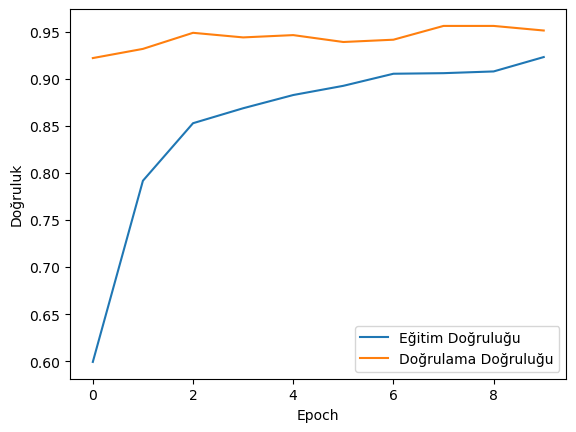

In [13]:
# Mevcut modelin eğitilmesi
# Orijinal dizi boyutu
original_shape = (1637, 350, 170, 3)


try:
    data = np.zeros(original_shape, dtype=np.float16)
    print("Dizi başarıyla oluşturuldu.")
except MemoryError:
    print("Yeterli bellek yok.")

# Alternatif olarak, dizi boyutunu küçültme
reduced_shape = (819, 175, 85, 3)
try:
    reduced_data = np.zeros(reduced_shape, dtype=np.float32)
    print("Küçük boyutlu dizi başarıyla oluşturuldu.")
except MemoryError:
    print("Yeterli bellek yok.")

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Eğitim sürecini görselleştirme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


## Model Değerlendirme
* Modelin performansını değerlendirin ve test seti üzerindeki doğruluğunu hesaplayın.

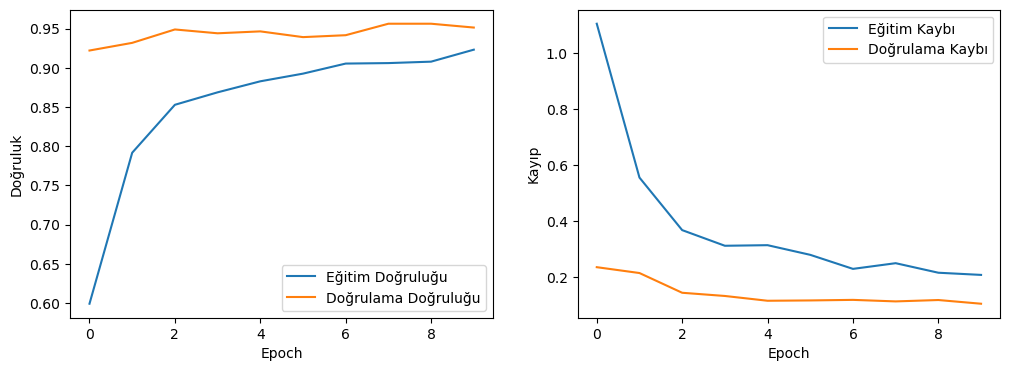

In [26]:
# Model değerlendirme
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Modelin doğruluk ve kayıp eğrilerini çizme
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.show()


## Model ve Ağırlıkları Kaydetme
* Modeli kaydedin ve gerektiğinde yükleyin.

In [6]:
# Modelin tamamını kaydetme (Keras formatı)
model_path = '2trained_model.keras'
model.save(model_path)
print(f"Model {model_path} dosyasına kaydedildi.")

# Sadece ağırlıkları kaydetme (doğru dosya uzantısıyla)
weights_path = '2model_weights.weights.h5'
model.save_weights(weights_path)
print(f"Ağırlıklar {weights_path} dosyasına kaydedildi.")

Model 2trained_model.keras dosyasına kaydedildi.
Ağırlıklar 2model_weights.weights.h5 dosyasına kaydedildi.




## Modeli bir fotoğraf ile test edin


In [1]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Dosya yolunu kontrol etmek için os modülünü import edin
import os

# Model ve ağırlıkları yükleme
model_path = 'trained_model.keras'  # Model dosyasının yolu
weights_path = 'model_weights.weights.h5'  # Ağırlık dosyasının yolu

# Eğitimli model ve ağırlıkların yüklenmesi
model = load_model(model_path)
model.load_weights(weights_path)
print("Model ve ağırlıkları yüklendi.")

# Görüntüyü yükleyin ve hazırlayın
def load_and_prepare_image(img_path, target_size=(170, 350)):
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"{img_path} yolunda dosya bulunamadı.")
    
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Batch boyutu ekleyin
    img_array /= 255.0  # Normalizasyon (modelinizin gereksinimlerine göre ayarlayın)
    return img_array

# Görüntü yükleyin ve hazırlayın
img_path = r'C:\Users\WaLFaLaR\tez\veri\son7\ortss\foto_9_(25-18).jpg'
prepared_image = load_and_prepare_image(img_path, target_size=(170, 350))
print(prepared_image)

# Modeli kullanarak tahmin yapın
predictions = model.predict(prepared_image)

# Tahmin sonucunu yazdırın
print("Predictions:", predictions)

# En yüksek olasılığı ve bu olasılığın hangi sınıfa ait olduğunu bulma
predicted_class_index = np.argmax(predictions)
predicted_class_probability = np.max(predictions)

print(f"Tahmin edilen sınıf endeksi: {predicted_class_index}")
print(f"Tahmin edilen sınıf olasılığı: {predicted_class_probability}")

# Sınıf isimleri (modelinizin eğitildiği sınıflara göre ayarlayın)
class_names = ['sayı=0', 'sayı=1', 'sayı=2', 'sayı=3', 'sayı=4', 'sayı=5', 'sayı=6', 'sayı=7', 'sayı=8', 'sayı=09']

predicted_class_name = class_names[predicted_class_index]
print(f"gerçek sınıf adı: {predicted_class_name}")


Model ve ağırlıkları yüklendi.
[[[[0.3254902  0.3372549  0.3647059 ]
   [0.3254902  0.3372549  0.3647059 ]
   [0.3254902  0.3372549  0.3647059 ]
   ...
   [0.3372549  0.3254902  0.32941177]
   [0.33333334 0.32156864 0.3254902 ]
   [0.33333334 0.32156864 0.3254902 ]]

  [[0.3254902  0.32941177 0.35686275]
   [0.3254902  0.32941177 0.35686275]
   [0.3254902  0.32941177 0.35686275]
   ...
   [0.3372549  0.32156864 0.32941177]
   [0.33333334 0.32156864 0.32156864]
   [0.33333334 0.32156864 0.32156864]]

  [[0.32156864 0.3254902  0.34901962]
   [0.32156864 0.3254902  0.34901962]
   [0.32156864 0.3254902  0.34901962]
   ...
   [0.3372549  0.32156864 0.32941177]
   [0.33333334 0.32156864 0.3254902 ]
   [0.33333334 0.32156864 0.3254902 ]]

  ...

  [[0.20392157 0.21960784 0.23529412]
   [0.20392157 0.21960784 0.23529412]
   [0.20392157 0.21568628 0.23529412]
   ...
   [0.20392157 0.21568628 0.22352941]
   [0.20392157 0.21568628 0.21960784]
   [0.20392157 0.21568628 0.21960784]]

  [[0.20392157